# Dataset analysis

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/movie_data.csv', sep=';')
df.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0


In [4]:
df.isnull().sum()

budget                  40
genres                  38
imdb_id                 45
original_title          37
overview                45
popularity              41
production_companies    29
production_countries    26
release_date            32
revenue                 32
runtime                 33
spoken_languages        45
vote_average            42
vote_count              37
dtype: int64

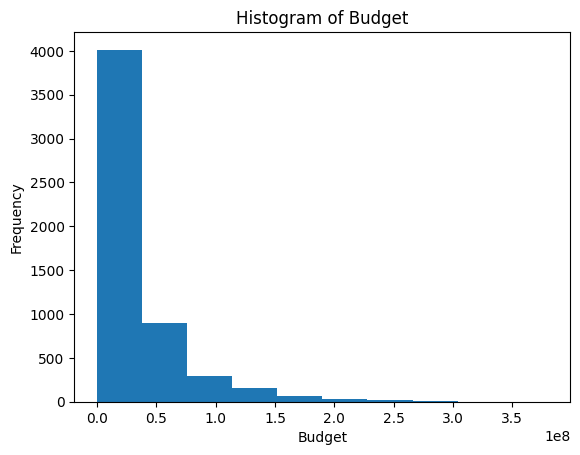

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['budget'], bins=10)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Histogram of Budget')
plt.show()

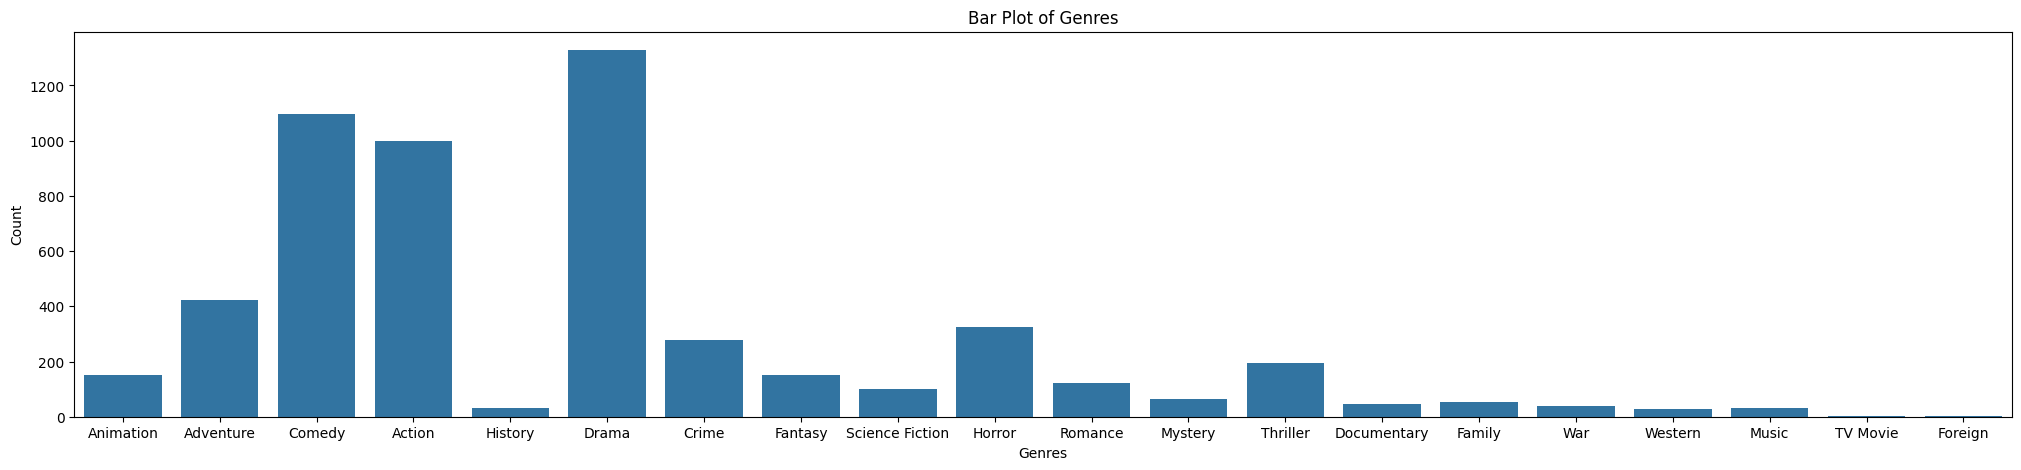

In [6]:
import seaborn as sns

plt.figure(figsize=(25,5)) # set figure size
ax = sns.countplot(x='genres', data=df)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Bar Plot of Genres')
plt.show()

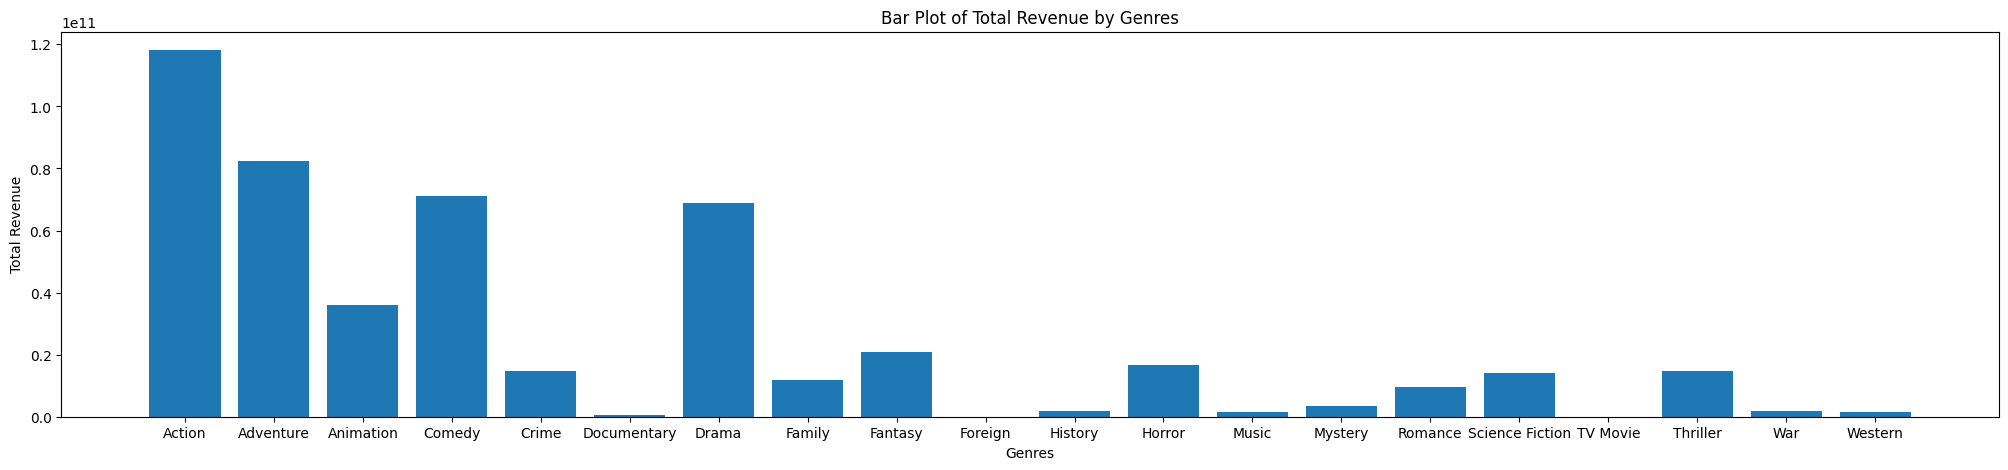

In [8]:
revenue_by_genre = df.groupby('genres')['revenue'].sum()

plt.figure(figsize=(25,5)) # set figure size
# Create the bar plot
plt.bar(revenue_by_genre.index, revenue_by_genre)
plt.xlabel('Genres')
plt.ylabel('Total Revenue')
plt.title('Bar Plot of Total Revenue by Genres')

# Show the plot
plt.show()

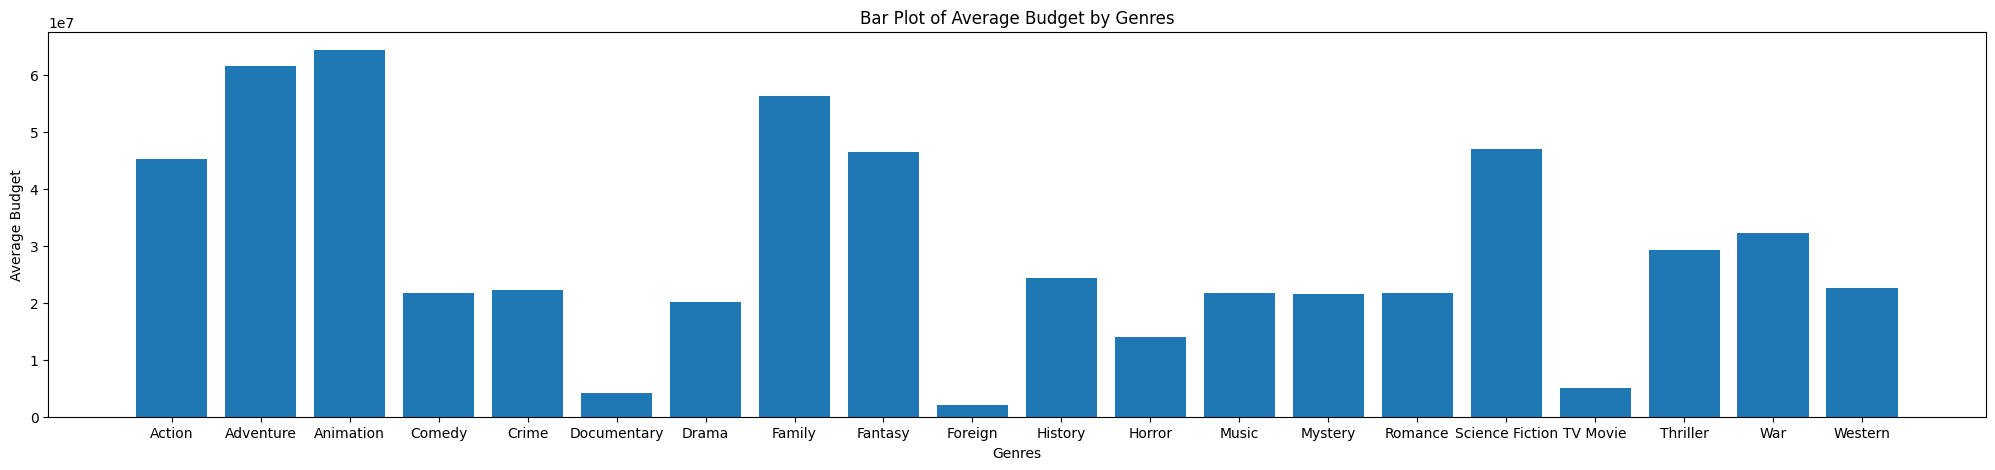

In [9]:
# Group the data by 'genres' and calculate the mean of the 'budget' feature for each group
budget_by_genre = df.groupby('genres')['budget'].mean()

# Create the bar plot
plt.figure(figsize=(25,5))
plt.bar(budget_by_genre.index, budget_by_genre)
plt.xlabel('Genres')
plt.ylabel('Average Budget')
plt.title('Bar Plot of Average Budget by Genres')

# Show the plot
plt.show()

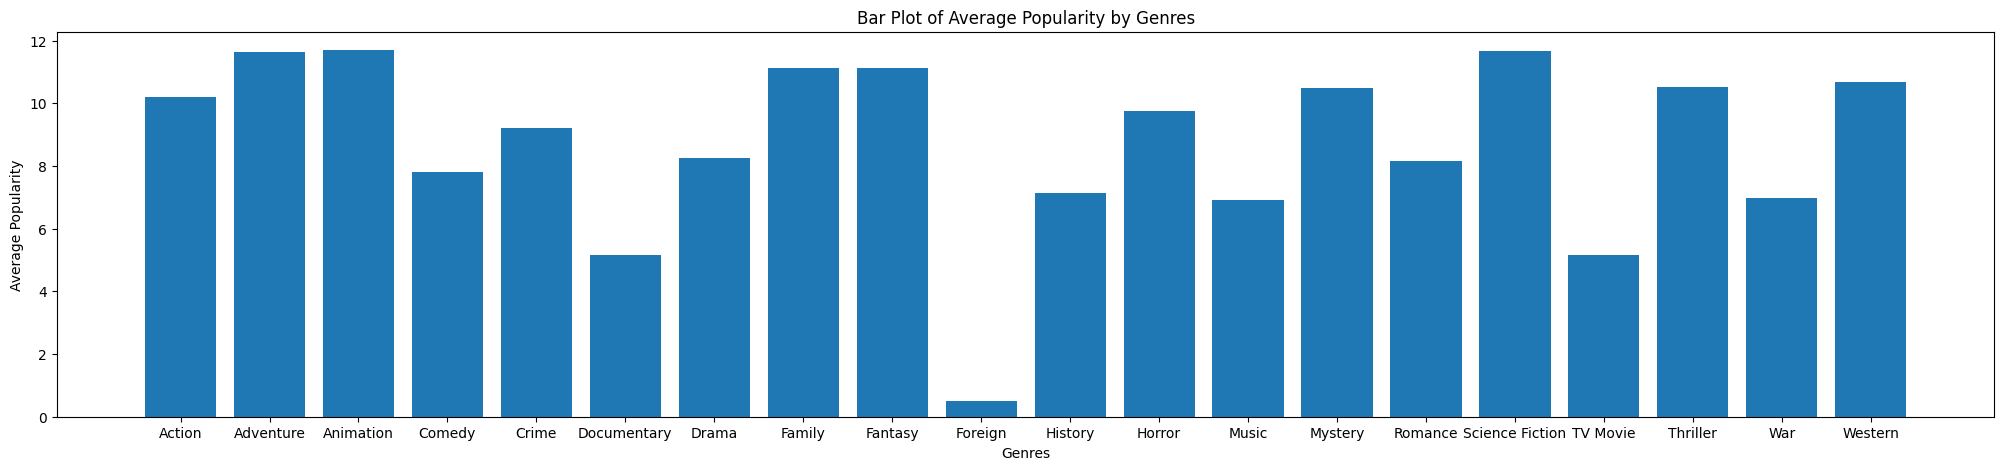

In [13]:
popularity_by_genre = df.groupby('genres')['popularity'].mean()

# Create the bar plot
plt.figure(figsize=(25,5))
plt.bar(popularity_by_genre.index, popularity_by_genre)
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Bar Plot of Average Popularity by Genres')

# Show the plot
plt.show()

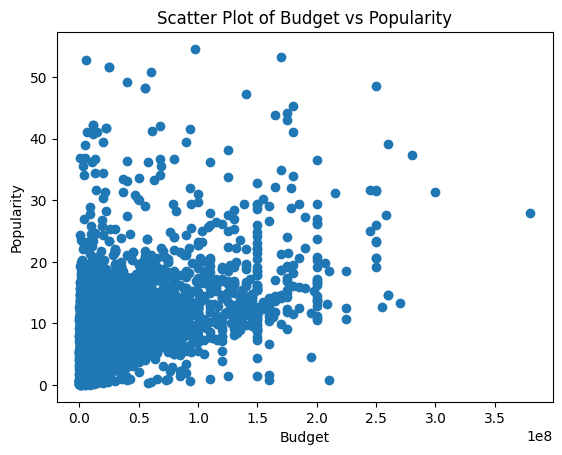

In [22]:
plt.scatter(df['budget'], df['popularity'])
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Budget vs Popularity')
plt.show()

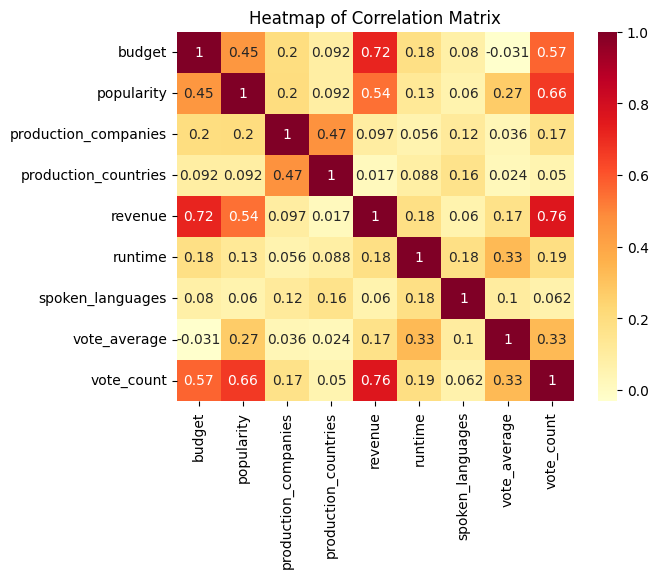

In [28]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="YlOrRd")
plt.title('Heatmap of Correlation Matrix')
plt.show()

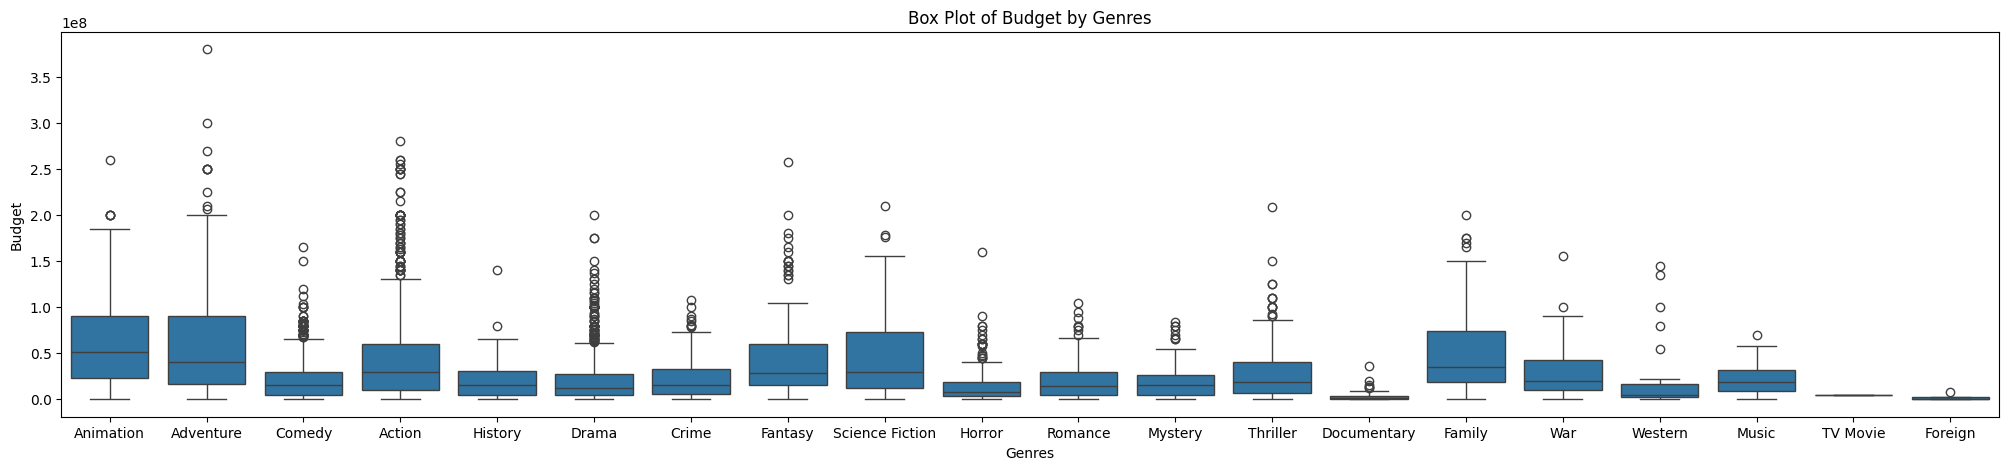

In [29]:
plt.figure(figsize=(25,5)) # set figure size
sns.boxplot(x='genres', y='budget', data=df)
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Box Plot of Budget by Genres')
plt.show()

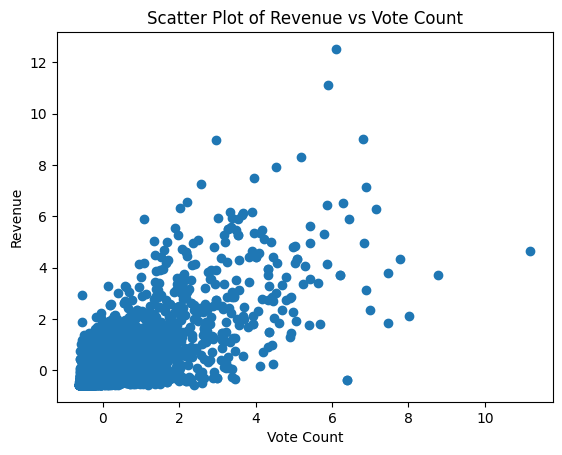

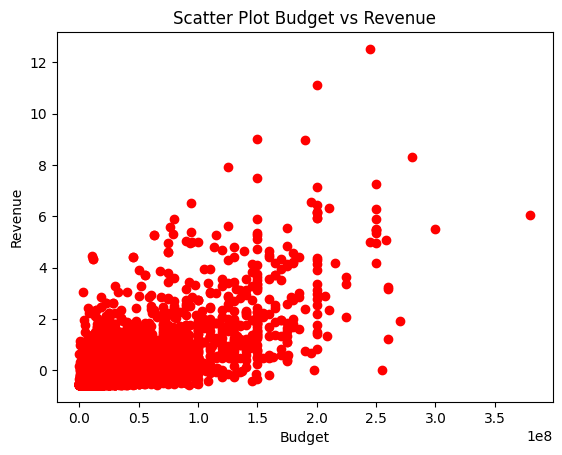

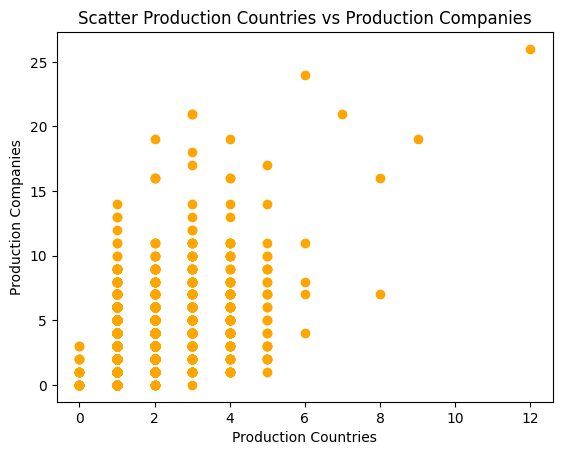

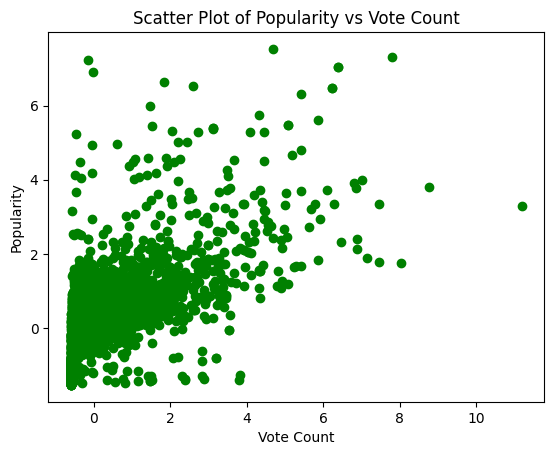

In [21]:
plt.scatter(df['vote_count'], df['revenue'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Revenue vs Vote Count')
plt.show()

plt.scatter(df['budget'], df['revenue'], c='red')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot Budget vs Revenue')
plt.show()

plt.scatter(df['production_countries'], df['production_companies'], c='orange')
plt.xlabel('Production Countries')
plt.ylabel('Production Companies')
plt.title('Scatter Production Countries vs Production Companies')
plt.show()

plt.scatter(df['vote_count'], df['popularity'], c='green')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Popularity vs Vote Count')
plt.show()

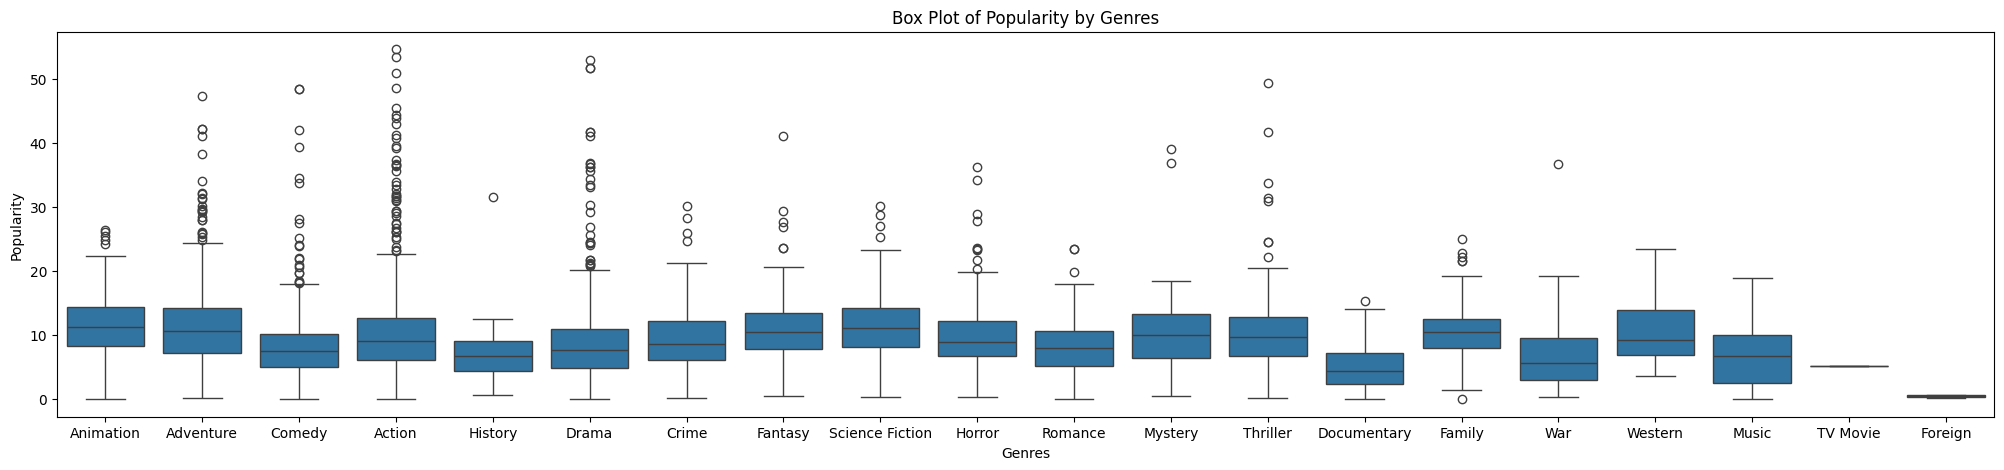

In [46]:
plt.figure(figsize=(25,5)) # set figure size
sns.boxplot(x='genres', y='popularity', data=df)
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Box Plot of Popularity by Genres')
plt.show()

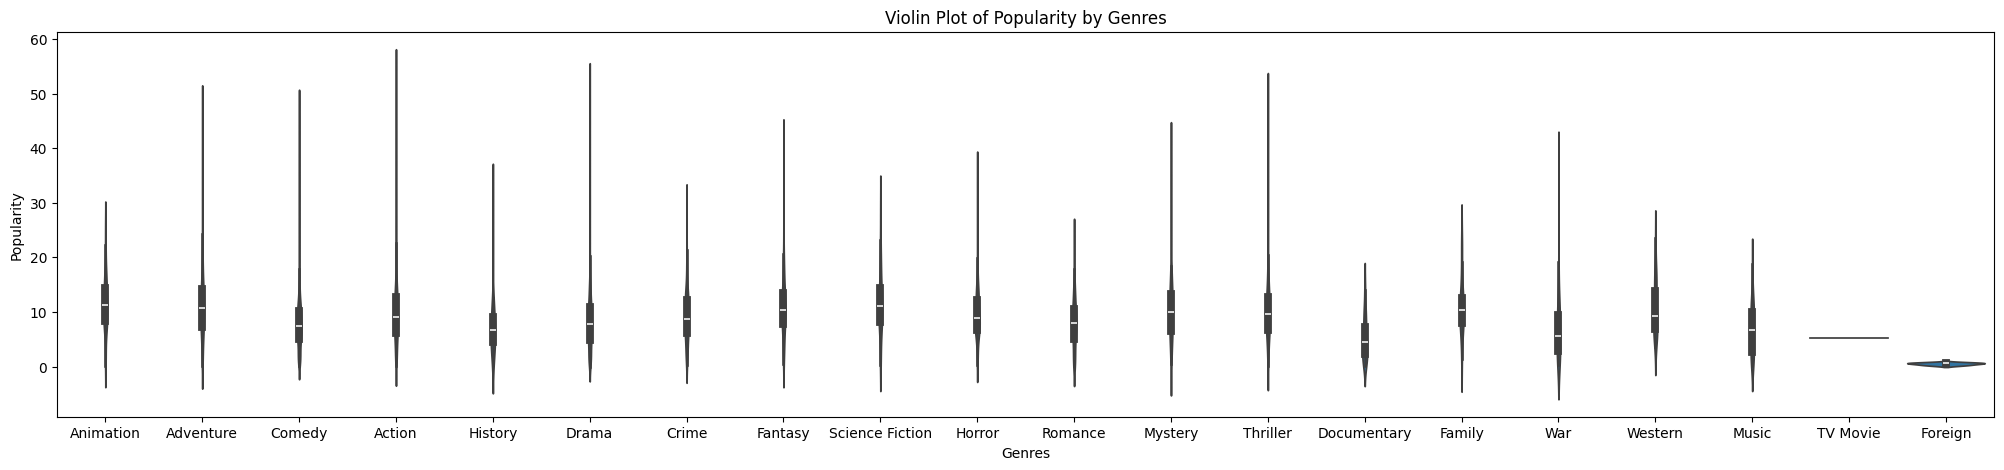

In [41]:
plt.figure(figsize=(25,5)) # set figure size
sns.violinplot(x='genres', y='popularity', data=df)
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Violin Plot of Popularity by Genres')
plt.show()